<a href="https://colab.research.google.com/github/Amitabhsar/customer-churn-prediction/blob/main/Customer_Churn_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Telco_customer_churn_ibm.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Preprocessing**

In [ ]:
df.drop('customerID', axis = 'columns', inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.duplicated().sum()

np.int64(22)

In [ ]:
df[df.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.3,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


In [ ]:
# Group by all columns to show sets of duplicate rows
duplicate_groups = df[df.duplicated(keep=False)].groupby(list(df.columns))

for name, group in duplicate_groups:
    print(f"\nDuplicate Group:\n{group}")



Duplicate Group:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
6491  Female              0      No         No       1          Yes   
6764  Female              0      No         No       1          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
6491            No     Fiber optic             No           No   
6764            No     Fiber optic             No           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
6491               No          No          No              No  Month-to-month   
6764               No          No          No              No  Month-to-month   

     PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
6491              Yes  Electronic check            69.2         69.2   Yes  
6764              Yes  Electronic check            69.2         69.2   Yes  

Duplicate Group:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4495 

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Let us check the percentage of missing values of the total rows! If the percentage is very low, less than 5% of the total rows, we can consider dropping them.

In [ ]:
print(f"{(df['TotalCharges'].isna().sum() / len(df)) * 100:.2f}%")

0.16%


Let us see if missing values happen randomly or not!

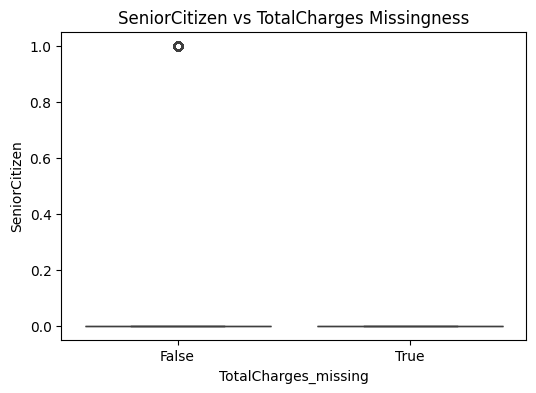

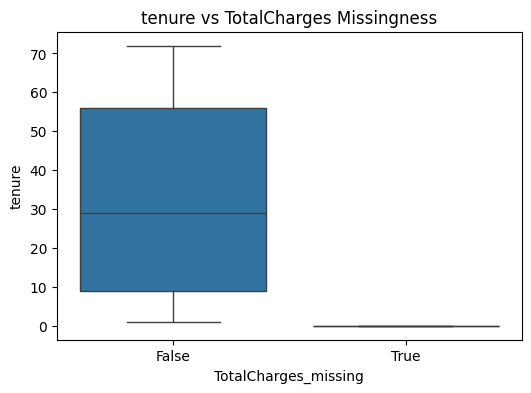

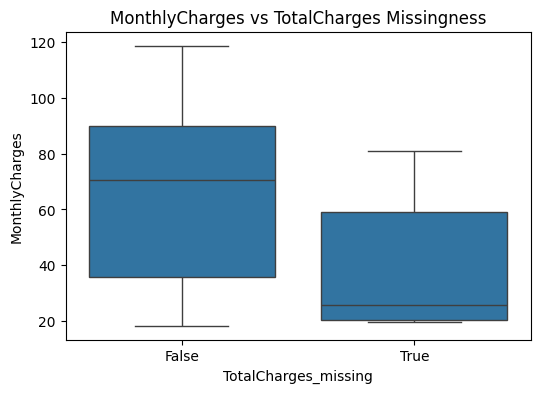

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['TotalCharges_missing'] = df['TotalCharges'].isna()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if col == 'TotalCharges':  # skip the target column
        continue
    plt.figure(figsize=(6,4))
    sns.boxplot(x='TotalCharges_missing', y=col, data=df)
    plt.title(f'{col} vs TotalCharges Missingness')
    plt.show()

Missing TotalCharges values are not random because they occur among customers with very low tenure. This shows that tenure strongly predicts missingness, meaning the pattern is systematic rather than MCAR. However, since only 11 rows are affected, the impact on the dataset is negligible.

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df.groupby(col)['TotalCharges_missing'].mean())


Column: gender
gender
Female    0.001437
Male      0.001694
Name: TotalCharges_missing, dtype: float64

Column: Partner
Partner
No     0.000553
Yes    0.002646
Name: TotalCharges_missing, dtype: float64

Column: Dependents
Dependents
No     0.000000
Yes    0.005213
Name: TotalCharges_missing, dtype: float64

Column: PhoneService
PhoneService
No     0.002933
Yes    0.001420
Name: TotalCharges_missing, dtype: float64

Column: MultipleLines
MultipleLines
No                  0.001485
No phone service    0.002933
Yes                 0.001346
Name: TotalCharges_missing, dtype: float64

Column: InternetService
InternetService
DSL            0.002067
Fiber optic    0.000000
No             0.003968
Name: TotalCharges_missing, dtype: float64

Column: OnlineSecurity
OnlineSecurity
No                     0.000287
No internet service    0.003968
Yes                    0.001981
Name: TotalCharges_missing, dtype: float64

Column: OnlineBackup
OnlineBackup
No                     0.000325
No internet 

Across categorical variables, certain groups—such as customers with no internet service, those on two-year contracts, dependent customers, or those using mailed checks—show slightly higher missing rates. Because missingness is uneven across categories, it is also systematic here. Still, the number of missing rows is very small, so the simplest and best solution is to drop them.

In [ ]:
# Dropping rows where TotalCharges is missing
df = df.dropna(subset=['TotalCharges'])

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7010 non-null   object 
 1   SeniorCitizen         7010 non-null   int64  
 2   Partner               7010 non-null   object 
 3   Dependents            7010 non-null   object 
 4   tenure                7010 non-null   int64  
 5   PhoneService          7010 non-null   object 
 6   MultipleLines         7010 non-null   object 
 7   InternetService       7010 non-null   object 
 8   OnlineSecurity        7010 non-null   object 
 9   OnlineBackup          7010 non-null   object 
 10  DeviceProtection      7010 non-null   object 
 11  TechSupport           7010 non-null   object 
 12  StreamingTV           7010 non-null   object 
 13  StreamingMovies       7010 non-null   object 
 14  Contract              7010 non-null   object 
 15  PaperlessBilling      7010

In [ ]:
# Let us convert binary categorical columns to 0 and 1
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
binary_map = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}

df[binary_columns] = df[binary_columns].replace(binary_map)

# One-hot encode multi-category columns
multi_category_columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df = pd.get_dummies(df, columns=multi_category_columns)
df = df.astype(int)
# Let us check the cleaned dataset structure
df.head()

/tmp/ipython-input-4256213741.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace(binary_map)
/tmp/ipython-input-4256213741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_columns] = df[binary_columns].replace(binary_map)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29,29,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56,1889,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53,108,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42,1840,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70,151,1,...,0,1,0,0,1,0,0,1,0,0


***Eddur obdhi porishkar***

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Let us now apply standardization to the numeric columns: tenure, MonthlyCharges, TotalCharges
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,-1.282728,0,1,-1.176789,-0.998235,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0.062387,1,0,-0.278879,-0.177000,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,-1.241967,1,1,-0.378647,-0.963355,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0.510759,0,0,-0.744462,-0.198635,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,-1.241967,1,1,0.186704,-0.944369,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.345224,1,1,0.652287,-0.132406,0,...,1,0,0,1,0,0,1,0,0,1
7039,0,0,1,1,1.611307,1,1,1.284150,2.239464,0,...,1,1,0,0,0,0,1,0,0,1
7040,0,0,1,1,-0.875118,0,1,-1.176789,-0.858272,0,...,0,1,0,0,1,0,0,1,0,0
7041,1,1,1,0,-1.160445,1,1,0.319728,-0.875933,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Saving the df to an Excel file
df.to_excel('df.xlsx', index=True)

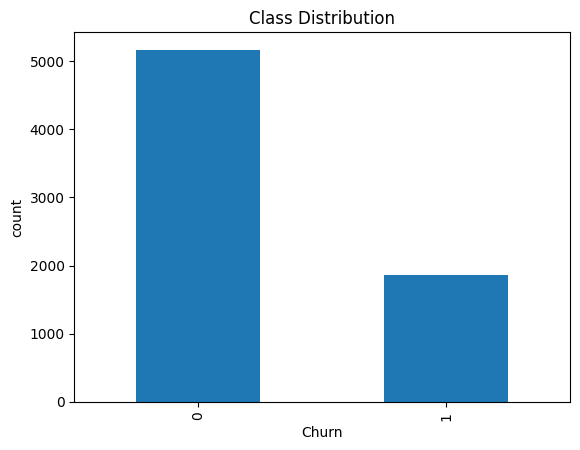

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Churn')
plt.ylabel('count')
plt.show()

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5164
1,1857


***Oversampling (Smote) to balance the target class***

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target (Churn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Applying SMOTE for oversampling the minority class (Churn=1)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verifying the resampling process
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: Churn
0    3614
1    1300
Name: count, dtype: int64
Resampled dataset shape: Churn
0    3614
1    3614
Name: count, dtype: int64


**1. Random Forest**

***1.1 Performance while Trained on Imbalanced Data***

In [ ]:
clf = RandomForestClassifier(random_state=42)

# Fitting the model on the old imbalanced training set
clf.fit(X_train, y_train)

# Prediction on the training set
y_train_pred = clf.predict(X_train)

# Making predictions on the test set
y_test_pred = clf.predict(X_test)

# Evaluating the model performance
from sklearn.metrics import accuracy_score
print("Accuracy Score on the Testing Set:")
print(accuracy_score(y_test, y_test_pred))

print("\nAccuracy Score on the Training Set:")
print(accuracy_score(y_train, y_train_pred))

#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_test_pred))

#print("\nClassification Report:")
#print(classification_report(y_test, y_test_pred))

Accuracy Score on the Testing Set:
0.7864261983863313

Accuracy Score on the Training Set:
0.9904354904354904


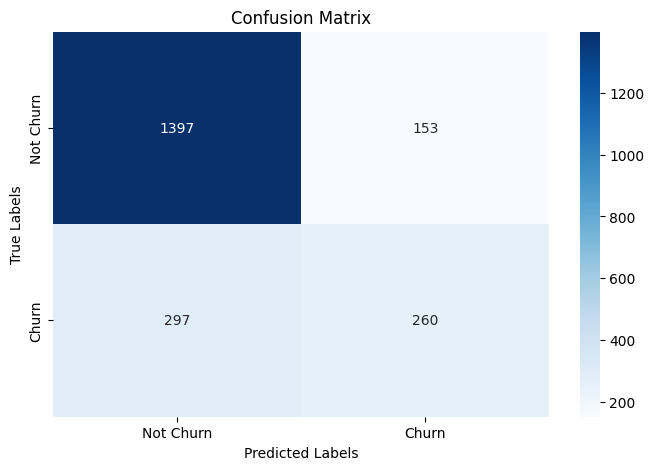

In [ ]:
import seaborn as sns
# Visualizing confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

***1.2 Performance while Trained on the balanced Data***

In [ ]:
clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training set
y_trainresampled_pred = clf.predict(X_train_resampled)

# Predict on the testing set
y_testresampled_pred = clf.predict(X_test)

print("Accuracy Score on the Testing Set:")
print(accuracy_score(y_test, y_testresampled_pred))

print("\nAccuracy Score on the Training Set:")
print(accuracy_score(y_train_resampled, y_trainresampled_pred))

Accuracy Score on the Testing Set:
0.7755102040816326

Accuracy Score on the Training Set:
0.9925290536801328


In [ ]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters from GridSearch
print(f"Best Parameters: {grid_search.best_params_}")

# To get the best model from the grid search
best_rf = grid_search.best_estimator_

# Let us now predict on the test set
y_testgrid_pred = best_rf.predict(X_test)

# Evaluating the model
test_accuracy = accuracy_score(y_test, y_testgrid_pred)
print(f"Test Accuracy after Hyperparameter Tuning: {test_accuracy * 100:.2f}%")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
127 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy after Hyperparameter Tuning: 77.55%


***The accuracy is still the same even after tunung the hyperparameters!***

**2. Logistic Regression**

***2.1 Without hyperparameter tuning***

Testing Set Accuracy: 77.69%


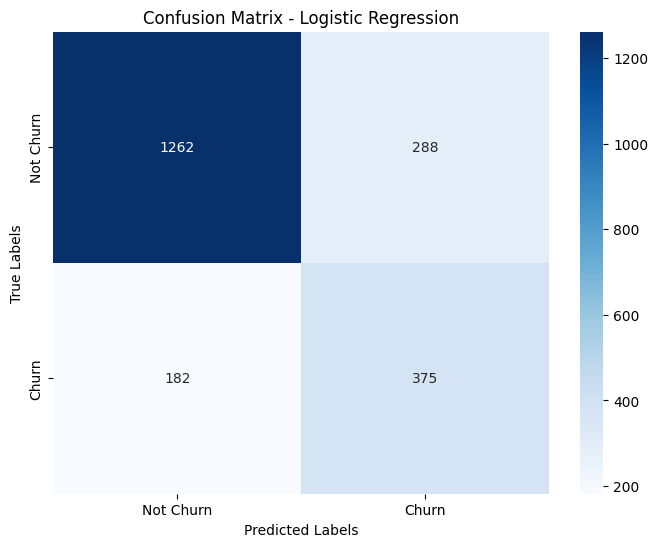

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train_resampled, y_train_resampled)

# Prediction on the test set
y_testlog_pred = logreg.predict(X_test)

testlog_accuracy = accuracy_score(y_test, y_testlog_pred)
print(f"Testing Set Accuracy: {testlog_accuracy * 100:.2f}%")

# Print classification report
#print("\nClassification Report for the Test Set:")
#print(classification_report(y_test, y_test_pred))

# Confusion matrix for the testing set
cm = confusion_matrix(y_test, y_testlog_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


***Adding polynomial terms to observe if there is any improvement in accuracy.***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generating polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_test_poly = poly.transform(X_test)

# Fit Logistic Regression on polynomial features
logreg.fit(X_train_poly, y_train_resampled)
y_test_pred_poly = logreg.predict(X_test_poly)


testpoly_accuracy = accuracy_score(y_test, y_test_pred_poly)
print(f"Testing Set Accuracy: {testpoly_accuracy * 100:.2f}%")

Testing Set Accuracy: 78.36%


In [ ]:
# Setting up the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000, 2000]  # Increase iterations to ensure convergence
}

# Initializing GridSearchCV with Logistic Regression
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Let us now retrieve the best model and its performance
best_logreg = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_test_best_pred = best_logreg.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_best_pred)
print(f"Test Accuracy after Tuning: {test_accuracy_best * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy after Tuning: 77.84%


**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

'''knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train_resampled, y_train_resampled)

predicted_y = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, predicted_y)
print("KNN accuracy:",accuracy_knn)'''

from sklearn.model_selection import cross_val_score
accuracies = []
for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    accuracies.append((k, scores.mean()))

# Print or plot the accuracies to select the best `k`
best_k = max(accuracies, key=lambda x: x[1])[0]
print("Optimal k:", best_k)


Optimal k: 3


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train_resampled, y_train_resampled)

predicted_y = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, predicted_y)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7271001423825344


Testing Set Accuracy with SVM: 78.79%


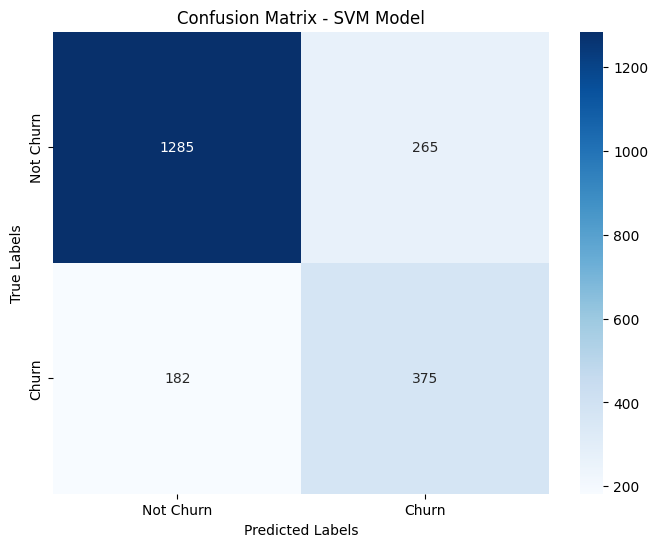

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_test_pred_svm = svm_model.predict(X_test)

# Calculating accuracy on the testing set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Testing Set Accuracy with SVM: {test_accuracy_svm * 100:.2f}%")

# Printing classification report for detailed metrics
# print("\nClassification Report for SVM on the Test Set:")
# print(classification_report(y_test, y_test_pred_svm))

# Confusion matrix for the testing set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy after Tuning: 78.41%


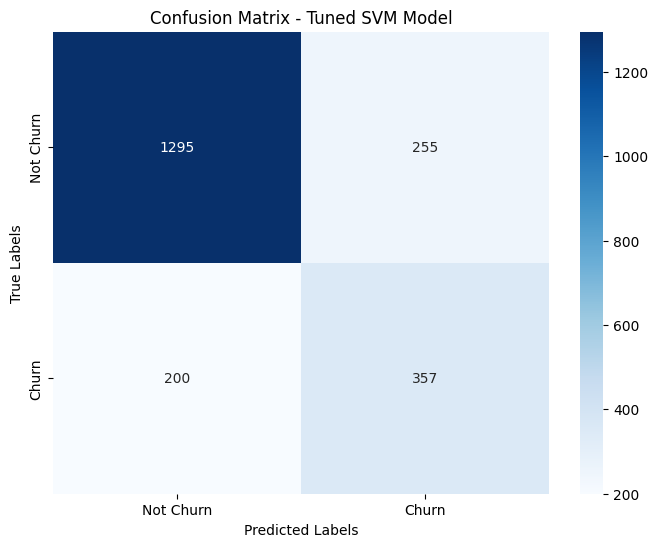

In [ ]:
# Let us set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Let us initialize GridSearchCV with the SVM model
svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_svm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Let us predict on the test set using the best model
y_test_pred_best_svm = best_svm.predict(X_test)

# Calculating and print the accuracy
test_accuracy_best_svm = accuracy_score(y_test, y_test_pred_best_svm)
print(f"Test Accuracy after Tuning: {test_accuracy_best_svm * 100:.2f}%")

# print("\nClassification Report for Tuned SVM on the Test Set:")
# print(classification_report(y_test, y_test_pred_best_svm))

# Confusion matrix for the testing set
cm_best_svm = confusion_matrix(y_test, y_test_pred_best_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Tuned SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Test Accuracy with Tuned XGBoost: 76.60%


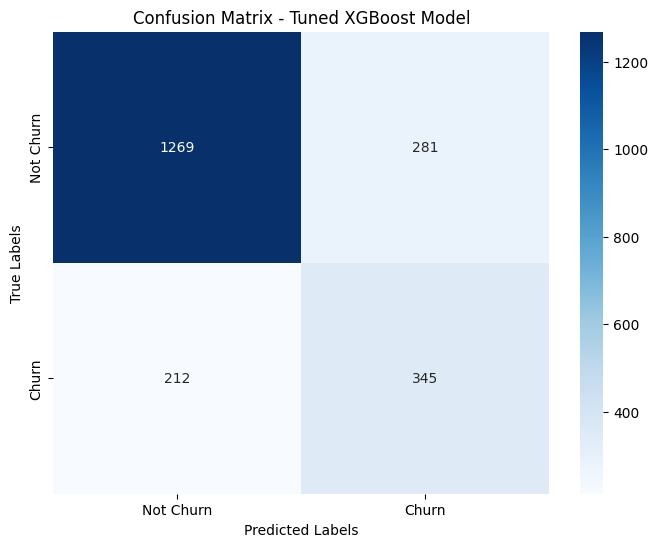

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds
    'max_depth': [3, 5, 7],                  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],            # Proportion of samples used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],     # Proportion of features used for each tree
    'gamma': [0, 0.1, 0.2]                   # Minimum loss reduction to make a split
}

# Initialize GridSearchCV with the XGBoost model
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model and its performance
best_xgb = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict on the test set using the best model
y_test_pred_xgb = best_xgb.predict(X_test)

# Calculate and print the accuracy
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Accuracy with Tuned XGBoost: {test_accuracy_xgb * 100:.2f}%")

# Print classification report for detailed metrics
# print("\nClassification Report for Tuned XGBoost on the Test Set:")
# print(classification_report(y_test, y_test_pred_xgb))

# Confusion matrix for the testing set
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Tuned XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Clustering Method : K-means**

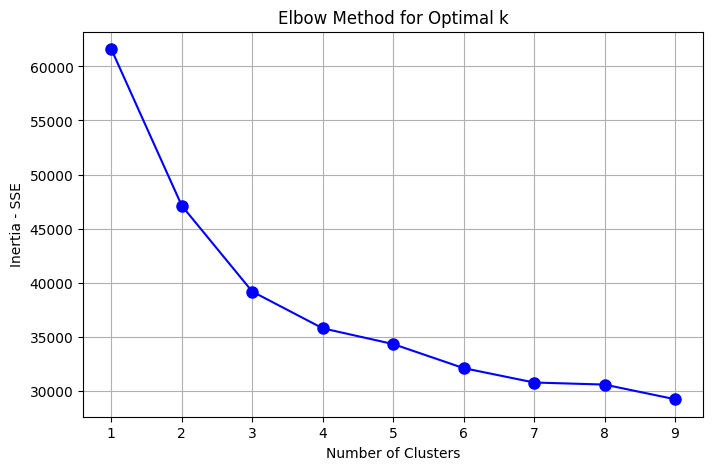

In [ ]:
from sklearn.cluster import KMeans

redundant_columns = ['InternetService_No', 'Contract_Two year', 'PaymentMethod_Mailed check',
                     'MultipleLines_Yes', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
                     'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']

# Let us select features for clustering
X = df.drop(['Churn'] + redundant_columns, axis=1)

# Let us now apply the Elbow method to find the optimal number of clusters
sse = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

# Let us now plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, sse, 'bo-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia - SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Let us now apply K-Means with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Let us print the number of customers in each cluster
print(df['Cluster'].value_counts())

# Let us now analyze each cluster's characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

Cluster
0    3153
1    2353
2    1515
Name: count, dtype: int64
           gender  SeniorCitizen   Partner  Dependents    tenure  \
Cluster                                                            
0        0.500159       0.196638  0.333650    0.204567 -0.713379   
1        0.507437       0.199320  0.683808    0.348066  0.998055   
2        0.508251       0.034323  0.489109    0.426403 -0.065439   

         PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
Cluster                                                                 
0            0.849033          0.669838        0.106459     -0.566201   
1            0.913727          0.682533        0.793833      1.216470   
2            0.998020          0.292409       -1.454493     -0.710970   

            Churn  ...  DeviceProtection_Yes  TechSupport_No  \
Cluster            ...                                         
0        0.442119  ...              0.245163        0.781478   
1        0.150446  ...              0

In [ ]:
cluster_summary

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.500159,0.196638,0.333650,0.204567,-0.713379,0.849033,0.669838,0.106459,-0.566201,0.442119,...,0.245163,0.781478,0.00000,0.218522,0.678719,0.00000,0.321281,0.677767,0.00000,0.322233
1,0.507437,0.199320,0.683808,0.348066,0.998055,0.913727,0.682533,0.793833,1.216470,0.150446,...,0.700382,0.424989,0.00000,0.575011,0.280068,0.00000,0.719932,0.270718,0.00000,0.729282
2,0.508251,0.034323,0.489109,0.426403,-0.065439,0.998020,0.292409,-1.454493,-0.710970,0.071947,...,0.000660,0.000660,0.99802,0.001320,0.001980,0.99802,0.000000,0.001980,0.99802,0.000000


**Insights From the Clusters:**

***Cluster 0:***

* Tenure is negative.

* Monthly charges are low, and they do not heavily subscribe to additional services (like streaming or tech support).
* Higher use of paperless billing.
* Likely to churn due to lower engagement with services and shorter tenure.

***Cluster 1:***

* Tenure is positive.
* Subscribes to multiple services, meaning higher engagement.
* High monthly and total charges, indicating they are more valuable customers.
* Loyal customers due to higher engagement and longer tenure.

***Cluster 2:***

* Very short tenure
* No tech support or streaming services
* Minimal monthly charges.
* Could represent customers who are new or disengaged having minimal subscriptions, making them more prone to churn.

**Potential Retention Strategies for all these Customer Groups:**

***Cluster 0: Short Tenure, Low Engagement, High Churn Risk***

- Onboarding Campaigns:

  Improve the onboarding experience to ensure customers quickly understand the value of the services they signed up for. It also ensures that the customers can fully utilize the product or service they bought.

- Early Incentives:

  1. Offer introductory discounts, loyalty points, or free trials for higher-tier services like tech support, device protection, or streaming.

  2. Bundle multiple services at a lower price for a limited time to show the value of upgrading their subscription.

- Proactive Customer Support and Feedback

***Cluster 2: Minimal Service Usage, Lowest Monthly Charges, High Churn Risk***

- These customers do not utilize many services (no streaming, tech support, or device protection), have minimal monthly charges, and may be seeking the most basic or cheapest offering. So, businesses can offer them accordingly.

- Offer promotions on services they aren't using yet (e.g., streaming services, device protection, or tech support). Show them how these additional services can improve their overall experience.

- Bundle existing services with enticing add-ons. For instance, "Upgrade to the premium plan and get 50% off on streaming services for the first 3 months."

- Reward and Loyalty Programs:

  1. Implement loyalty programs that reward them for continued usage, referrals, or exploring new services.

  2. Offer points or discounts for every month they stay, encouraging longer retention.

***Cluster 1: Most Loyal Group***

- Exclusive Offers and VIP Programs:

  Provide them with VIP benefits, such as early access to new services, premium customer support, or exclusive discounts.

- Celebrate milestones such as anniversaries or birthdays with special offers.

- Regularly ask for feedback and involve them in co-creating new services or improving existing ones. Loyal customers often feel valued when they are given a voice in shaping future offerings.

In [ ]:
# Saving the cluster summary to an Excel file
cluster_summary.to_excel('cluster_summary.xlsx', index=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Cluster
0,0,0,1,0,-1.282728,0,1,-1.176789,-0.998235,0,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0.062387,1,0,-0.278879,-0.177000,0,...,1,0,0,1,0,0,1,0,0,0
2,1,0,0,0,-1.241967,1,1,-0.378647,-0.963355,1,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0.510759,0,0,-0.744462,-0.198635,0,...,0,0,1,1,0,0,1,0,0,0
4,0,0,0,0,-1.241967,1,1,0.186704,-0.944369,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.345224,1,1,0.652287,-0.132406,0,...,0,0,1,0,0,1,0,0,1,1
7039,0,0,1,1,1.611307,1,1,1.284150,2.239464,0,...,1,0,0,0,0,1,0,0,1,1
7040,0,0,1,1,-0.875118,0,1,-1.176789,-0.858272,0,...,1,0,0,1,0,0,1,0,0,0
7041,1,1,1,0,-1.160445,1,1,0.319728,-0.875933,1,...,1,0,0,1,0,0,1,0,0,0


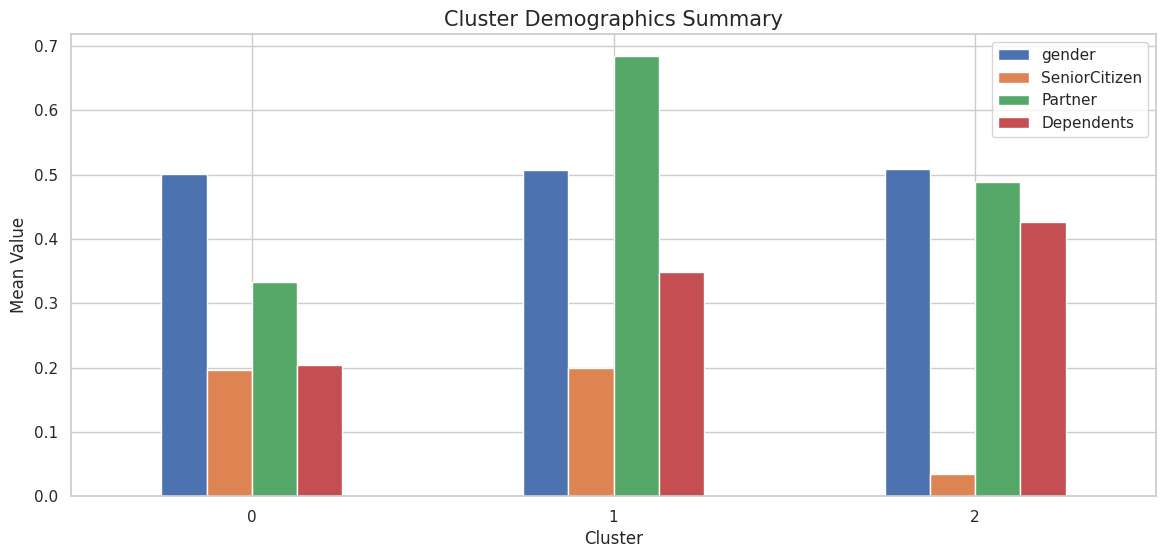

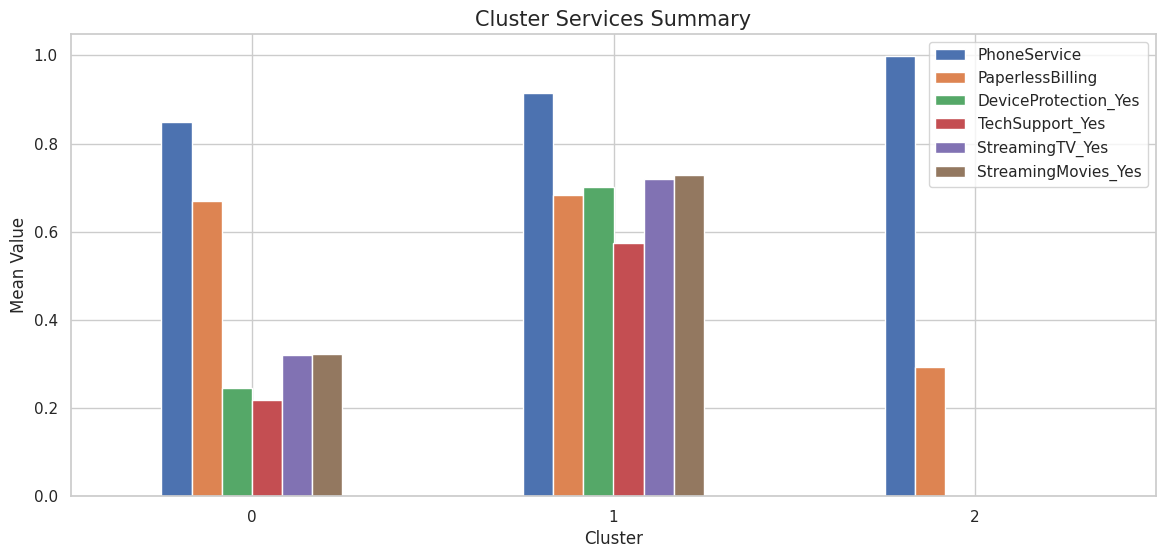

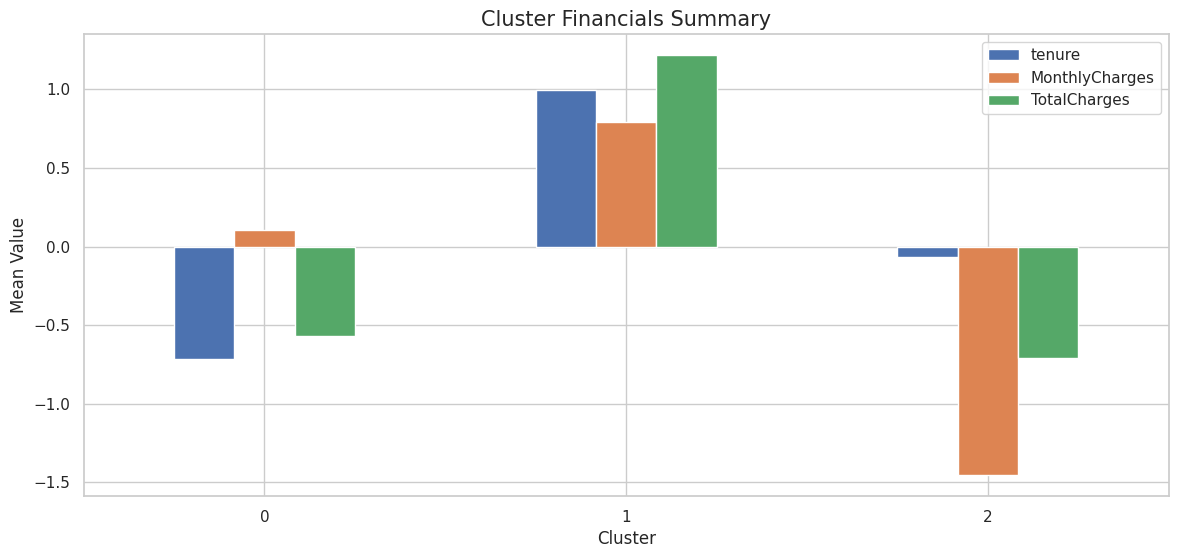

In [ ]:
import seaborn as sns

file_path = '/content/cluster_summary.xlsx'
cluster_summary_df = pd.read_excel(file_path)

# Setting plot style
sns.set(style="whitegrid")

# Function to create bar plots for each category of features
def plot_cluster_summary(cluster_df, features, title):

    # Plotting
    cluster_df[features].plot(kind="bar", figsize=(14, 6))
    plt.title(title, fontsize=15)
    plt.ylabel("Mean Value")
    plt.xlabel("Cluster")
    plt.xticks(rotation=0)
    plt.legend(loc='best')
    plt.show()

demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plot_cluster_summary(cluster_summary_df, demographics, "Cluster Demographics Summary")

services = ['PhoneService', 'PaperlessBilling', 'DeviceProtection_Yes', 'TechSupport_Yes',
            'StreamingTV_Yes', 'StreamingMovies_Yes']
plot_cluster_summary(cluster_summary_df, services, "Cluster Services Summary")

financials = ['tenure', 'MonthlyCharges', 'TotalCharges']
plot_cluster_summary(cluster_summary_df, financials, "Cluster Financials Summary")

<ipython-input-28-c25b561fdac3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary_df['Cluster'], y=cluster_summary_df['Churn_Percentage'], palette='viridis')


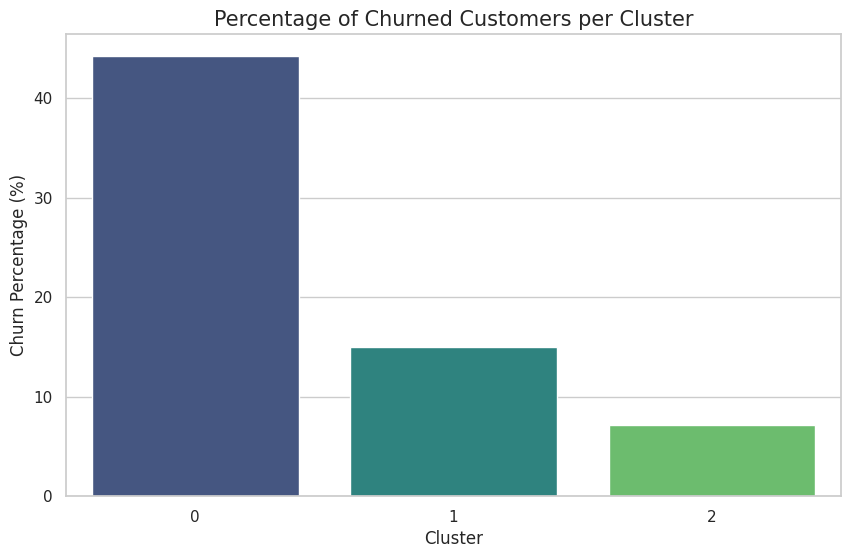

In [ ]:
if 'Churn' in cluster_summary_df.columns:
    cluster_summary_df['Churn_Percentage'] = cluster_summary_df['Churn'] * 100

    # Plotting the churn percentage for each cluster
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_summary_df['Cluster'], y=cluster_summary_df['Churn_Percentage'], palette='viridis')
    plt.title('Percentage of Churned Customers per Cluster', fontsize=15)
    plt.ylabel('Churn Percentage (%)')
    plt.xlabel('Cluster')
    plt.show()
else:
    print("The 'Churn' column is not found in the dataset.")


In [ ]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'MultipleLines_No phone service', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

**Feature Selection Technique to have the top features**

Top Features based on Random Forest:
                    Feature  Importance
8              TotalCharges    0.237429
7            MonthlyCharges    0.172270
4                    tenure    0.136276
11  Contract_Month-to-month    0.051243
24           TechSupport_No    0.046465
22      DeviceProtection_No    0.045399
18        OnlineSecurity_No    0.034440
20          OnlineBackup_No    0.033123
28       StreamingMovies_No    0.031009
23     DeviceProtection_Yes    0.028946


<ipython-input-30-f799cf9d0967>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


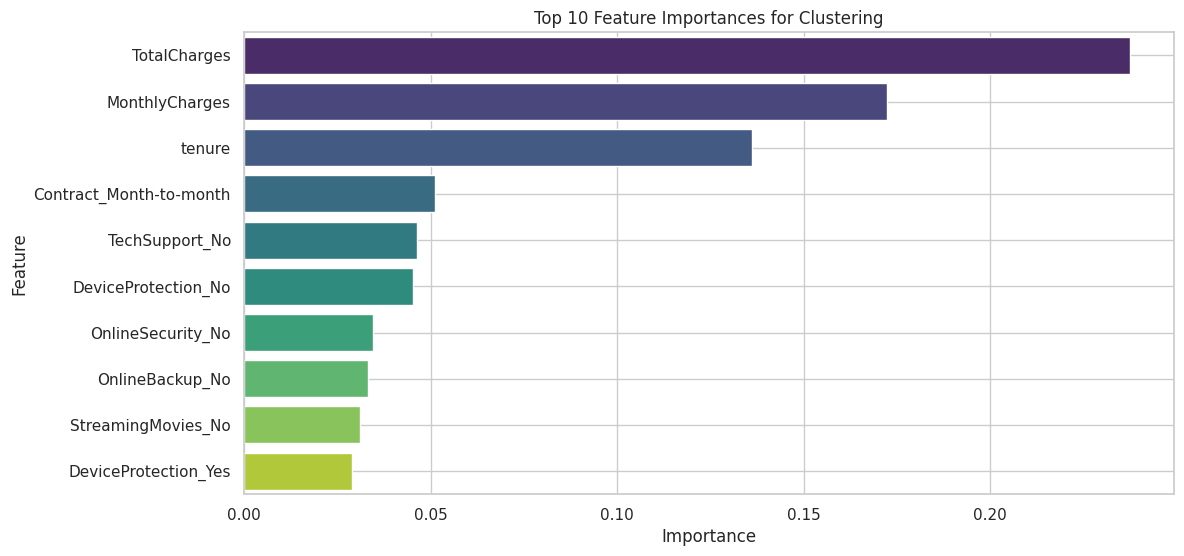

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Let us verify the alignment of 'X' and 'Cluster' column in 'df'
assert len(X) == len(df), "Mismatch between X and df in terms of length."
assert 'Cluster' in df.columns, "Cluster column not found in df."

# let us now calculate Feature Importance using Random Forest
# Using the generated cluster labels as the target
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, df['Cluster'])  # Fitting with X and the cluster labels from df

# Extract feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features based on Random Forest:")
print(feature_importance_df.head(10))

# Step 3: Visualize the Top Features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances for Clustering')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

**Visualizing Clusters**

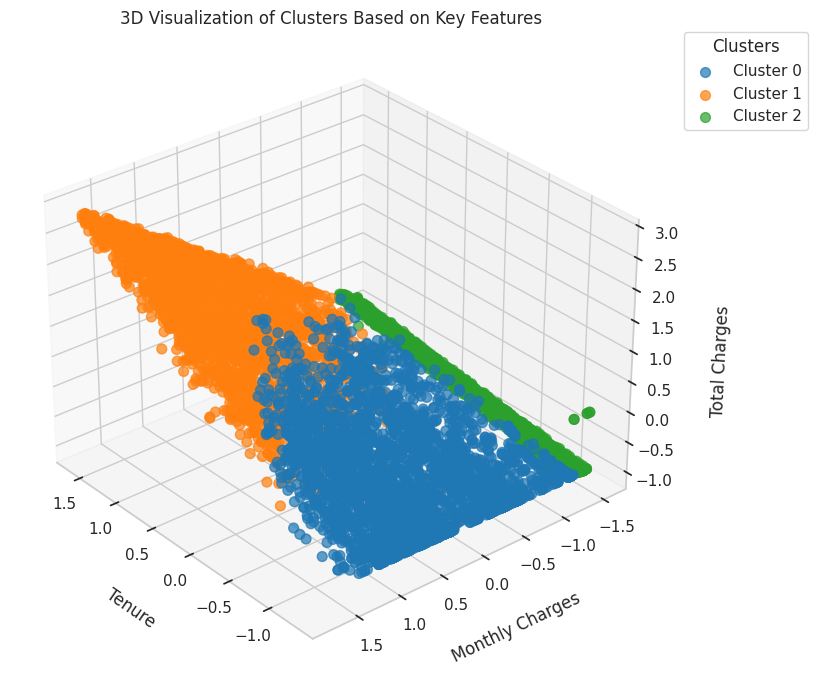

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Let us define custom colors for each cluster
cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}  # Color mapping for three clusters

# Creating a 3D scatter plot using the three most significant features
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting each cluster separately and assign a label and color
for cluster, color in cluster_colors.items():
    ax.scatter(df[df['Cluster'] == cluster]['tenure'],
               df[df['Cluster'] == cluster]['MonthlyCharges'],
               df[df['Cluster'] == cluster]['TotalCharges'],
               s=50, marker = 'o', alpha=0.7, color=color, label=f'Cluster {cluster}')

ax.set_xlabel('Tenure', labelpad=15)
ax.set_ylabel('Monthly Charges', labelpad=15)
ax.set_zlabel('Total Charges', labelpad=15)

# Adjusting the view angle for better visibility
ax.view_init(elev=30, azim=140)

# Adding a legend to show the cluster labels
plt.legend(title="Clusters", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.title('3D Visualization of Clusters Based on Key Features')
plt.tight_layout()  # To ensure tight layout so nothing is cut off
plt.show()


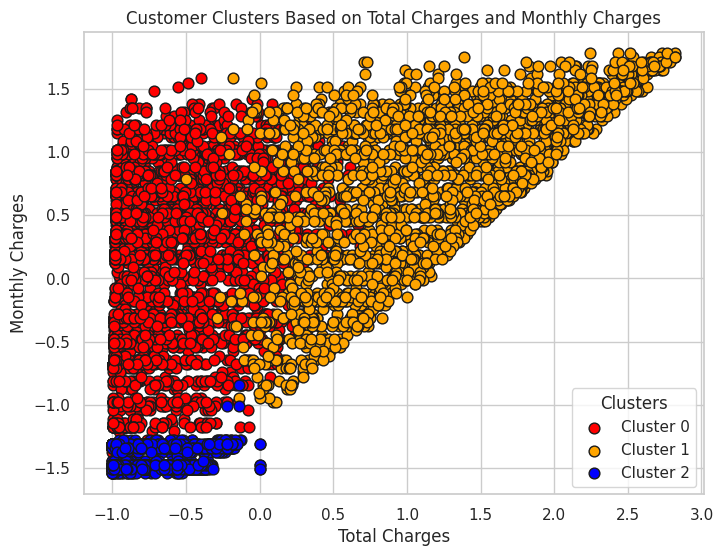

In [ ]:
# Let us define a dictionary for cluster colors and labels
cluster_colors = {0: 'red', 1: 'orange', 2: 'blue'}
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}

plt.figure(figsize=(8, 6))

# Plot each cluster separately to add a legend
for cluster, color in cluster_colors.items():
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['TotalCharges'], subset['MonthlyCharges'],
                color=color, label=cluster_labels[cluster], marker='o', edgecolor='k', s=60)

plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.title('Customer Clusters Based on Total Charges and Monthly Charges')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()


**Now let us visualize the clusters with PCA**

Explained variance by Component 1: 72.56%
Explained variance by Component 2: 25.41%
Total explained variance by both components: 97.97%


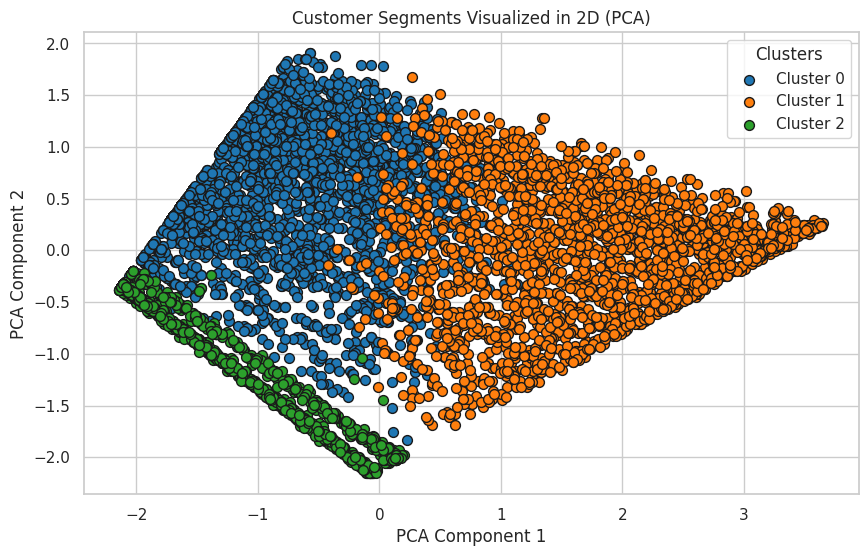

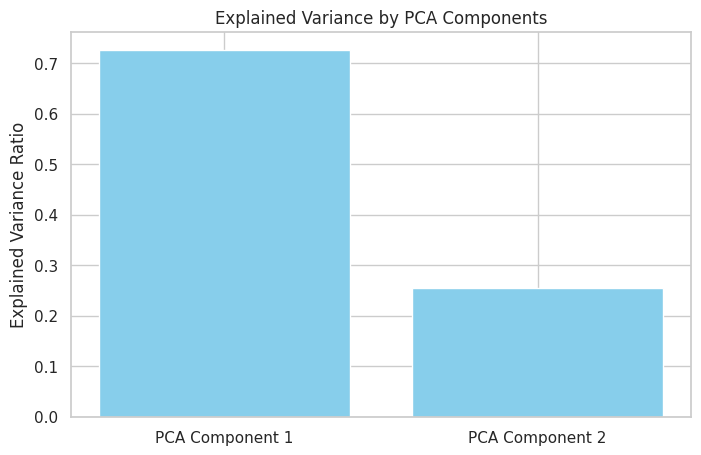

In [ ]:
from sklearn.decomposition import PCA

# Let us define the continuous variables and the selected features
X_continuous = X[['tenure', 'MonthlyCharges', 'TotalCharges']]
X_fs = X[['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_DSL', 'Contract_Month-to-month', 'OnlineSecurity_No', 'StreamingTV_No', 'DeviceProtection_No', 'TechSupport_No']]

# Performing PCA to reduce to two dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_continuous)

# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Explained variance for both components
print(f"Explained variance by Component 1: {explained_variance[0]:.2%}")
print(f"Explained variance by Component 2: {explained_variance[1]:.2%}")
print(f"Total explained variance by both components: {sum(explained_variance):.2%}")

# Let us define colors for the clusters (3 clusters now)
cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c'}

plt.figure(figsize=(10, 6))

# Plotting each cluster separately with a label and color
for cluster, color in cluster_colors.items():
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1],
                color=color, label=f'Cluster {cluster}', edgecolor='k', s=50)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments Visualized in 2D (PCA)')
plt.legend(title="Clusters", loc="upper right")
plt.grid(True)
plt.show()

# Bar plot to show explained variance
plt.figure(figsize=(8, 5))
plt.bar(['PCA Component 1', 'PCA Component 2'], explained_variance, color='skyblue')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()


In [ ]:
pca_components = pd.DataFrame(pca.components_, columns=X_continuous.columns, index=['PC1', 'PC2'])

# Let us display the contribution of each feature to the first two principal components
print(pca_components)

       tenure  MonthlyCharges  TotalCharges
PC1  0.567075        0.485608      0.665290
PC2 -0.607295        0.792164     -0.060573


**The features with larger absolute values (positive or negative) are the ones that contribute the most to the corresponding principal component.**